# Flight Price Prediction
### Umar Faruk Abdullahi (contactumarfaruk@gmail.com)

### Project Description:
In this project, data from flight websites is scraped and necessary data processing is performed before moving to Exploratory Data Analysis (EDA) to understand the data and find underlying patterns in the features of the data.

Lastly, a simple user interface is implemented to filter the data based on a user specified criteria.

The project is separated into four steps:


*   Web scraping
*   Data preprocessing
*   Exploratory Data Analysis (EDA)
*   User Interaction



## Installations

In this section, we install all necessary software requirements for our project. This includes the **Linux chromedriver** package and the [selenium](https://pypi.org/project/selenium/) **Python** package for scraping web data.

Also included is the [selenium-stealth](https://pypi.org/project/selenium-stealth/) package for bypassing websites' bot protection.

In [ ]:
# Install Linux dependencies
!apt-get update
!apt install chromium-chromedriver

# Install Python dependencies
!pip install selenium
!pip install selenium-stealth

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,342 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,266 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 2,950 kB in 3s (1,064 kB/s)
Reading package li

## Step 1: Web Scraping

In this section, the flight data is scraped from selected flight websites. For this project, the following websites were selected with the trip details as follows (**Helsinki to London (one way)**):


1.   [Kayak](https://www.kayak.com/flights/HEL-LON/2023-10-30?sort=bestflight_a)
2.   [Momondo](https://www.momondo.com/flight-search/HEL-LON/2023-10-30?sort=bestflight_a)
3.   [Skiplagged](https://skiplagged.com/flights/HEL/LON/2023-10-30)

A Chrome webdriver was set up using **selenium** and wraped with the **selenium-stealth** library to prevent bot detection on the flight websites. For every website, the scraped data was saved to a **HTML** file for later use and processing steps. This was done to prevent multiple fetches of the same data.



**Note:** Scraping the data from the websites might take a lot of time. This is due to their dynamic nature and requests must wait before fetching data. Also, the structure of the websites might change.

If urgency is desired, **Run** the [cell](#scrollTo=_b23k7gwlovw&line=2&uniqifier=1) in the **Step 2: Data Processing** to fetch a cached copy of the data from GitHub and proceed to the remaining steps.

In [ ]:
# Import required libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium_stealth import stealth
from time import sleep

ModuleNotFoundError: ignored

In [ ]:
# Setup chrome web agent
chrome_options = webdriver.ChromeOptions()
# google colab allows only headless mode => no gui
# disable this locally if you want to see the browser window
chrome_options.add_argument('--headless')
# set window size, click() does not work if window has no size
chrome_options.add_argument('--window-size=1920,1080')
# other options, might not be needed
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--enable-javascript')

In [ ]:
driver = webdriver.Chrome(options=chrome_options)

# spoof the user agent, might get around the bot detection
stealth(driver,
 languages=["en-US", "en"],
 vendor="Google Inc.",
 platform="Win32",
 webgl_vendor="Intel Inc.",
 renderer="Intel Iris OpenGL Engine",
 fix_hairline=True,
)

# Get data from Kayak
url = "https://www.kayak.com/flights/HEL-LON/2023-10-30?sort=bestflight_a"
driver.get(url)

# Wait for the page and javascript to load
sleep(5)

# Clicking away the cookie banner that might be displayed on site visit
try:
  driver.find_element(By.CSS_SELECTOR, "[data-test-cookies-reject]").click()
except:
  pass


# Loading more flight data by clicking the "Load more" button
while True:
  try:
    driver.find_element(By.CSS_SELECTOR, ".resultsPaginator").click()
    sleep(2)
  except:
    break


# Saved to a local HTML file
with open('kayak.html', 'w') as f:
  f.write(driver.page_source)

# Close the browser
driver.close()

In [ ]:
driver = webdriver.Chrome(options=chrome_options)

# spoof the user agent, might get around the bot detection
stealth(driver,
 languages=["en-US", "en"],
 vendor="Google Inc.",
 platform="Win32",
 webgl_vendor="Intel Inc.",
 renderer="Intel Iris OpenGL Engine",
 fix_hairline=True,
)

# Get data from Momondo
url = "https://www.momondo.com/flight-search/HEL-LON/2023-10-30?sort=bestflight_a"
driver.get(url)

# Wait for the page and javascript to load
sleep(5)

try:
  driver.find_element(By.CSS_SELECTOR, "[data-test-cookies-reject]").click()
except:
  pass


# Clicking away the cookie banner that might be displayed on site visit
while True:
  try:
    driver.find_element(By.CSS_SELECTOR, ".resultsPaginator").click()
    sleep(2)
  except:
    break


# Saved to a local HTML file

with open('momondo.html', 'w') as f:
  f.write(driver.page_source)

# Close the browser
driver.close()

In [ ]:
driver = webdriver.Chrome(options=chrome_options)

# spoof the user agent, might get around the bot detection
stealth(driver,
 languages=["en-US", "en"],
 vendor="Google Inc.",
 platform="Win32",
 webgl_vendor="Intel Inc.",
 renderer="Intel Iris OpenGL Engine",
 fix_hairline=True,
)

# Get data from SkipLagged
url = "https://skiplagged.com/flights/HEL/LON/2023-10-30"
driver.get(url)

sleep(5)

try:
  driver.find_element(By.CSS_SELECTOR, "[data-test-cookies-reject]").click()
except:
  pass

# Save contents to a local HTML file
with open('skiplagged.html', 'a') as f:
  f.write(driver.page_source)

  # Scroll 10 times to get more data
  for i in range(10):
    try:
      driver.execute_script("window.scrollBy(0, window.innerHeight)")
      sleep(1)
      f.write(driver.page_source)
    except:
      break

# Close the browser
driver.close()

## Step 2: Data Processing
In this step, a Pandas DataFrame was initialized with columns for the required features from every flight websites. Features were selected based on their utility in **Exploratory Data Analysis** and as criteria for the user interaction **Step 4**.  The selected features are as follows:


*   **Start**
*   **Destination**
*   **Departure Time**
*   **Arrival Time**
*   **Flight Duration**
*   **Price**
*   **No of Stops**
*   **Layovers**
*   **Operator**
*   **Source**

A temporary DataFrame was created in accordance with the specified feature-set for every booking website to process data based on the format provided by the website. The dataframes were then merged into a final DataFrame for final data processing, standardization and EDA.

In [ ]:
# @title Run this only if you are getting the cached HTML data from GitHub
import requests

# Get cached copy of websites' data from GitHub
flight_websites = ['kayak','momondo','skiplagged']

for flight_website in flight_websites:
  with open(f"{flight_website}.html", 'w', encoding="utf-8") as file:
    url = f"https://raw.githubusercontent.com/farouqu/ds_proj_1/main/{flight_website}.html"
    html = requests.get(url).text
    file.write(html)

In [ ]:
# Create dataframe
import pandas as pd
import re

df = pd.DataFrame(columns=['Start', 'Destination', 'Departure Time', 'Arrival Time', 'Flight Duration', 'Price', 'No of Stops', 'Layovers', 'Operator','Source'])

In [ ]:
# Utility functions for data processing

# Convert layover list to a list of key, value pairs of duration and layover location
def process_layover_info(info_list):
    processed_info_list = []

    if len(info_list) == 0:
      return []

    for item in info_list:
      matches = re.findall(r'(\d+)h (\d+)m', item)

      for match in matches:
          hours, minutes = map(int, match)
          layover_location = item.split('<b>')[1].split('</b>')[0]
          processed_info = {"Duration": int(hours), "Location": layover_location}
          processed_info_list.append(processed_info)

    return processed_info_list

# Set the correct airport name in London based on the 3-letter identifier
def set_airport_name(row):
  if 'STN' in row:
    return 'London Stansted'
  elif 'LHR' in row:
    return 'London Heathrow'
  elif 'LGW' in row:
    return 'London Gatwick'
  elif 'LTN' in row:
    return 'London Luton'
  elif 'LCY' in row:
    return 'London City'
  else:
    return 'London'

# Convert layover list to a list of key, value pairs of duration and layover location for Skiplagged
# Define a function to extract and convert information
def process_skip_layover_info(info_list):
    processed_info_list = []

    for item in info_list:
        matches = re.findall(r'(\d+)h (\d+)m(\w+)', item)

        for match in matches:
            hours, minutes, layover_location = match
            processed_info = {"Duration": int(hours), "Location": layover_location}
            processed_info_list.append(processed_info)

    return processed_info_list

### Kayak

In [ ]:
# Store Kayak dataframe
kayak_df = df.copy()

from bs4 import BeautifulSoup
with open('kayak.html', 'r') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')

flights = soup.find_all('div',class_='nrc6')

index = 0
while index < len(flights):
  flight = flights[index]
  flight_soup = BeautifulSoup(str(flight),'html.parser')

  departure_arrival = flight_soup.select('div.EFvI > .c_cgF.c_cgF-mod-variant-default')
  if len(departure_arrival) < 2:
    index += 1
    continue

  departure_airport = departure_arrival[0]["title"]
  arrival_airport = departure_arrival[1]["title"]
  departure = flight_soup.select('div.VY2U > .vmXl.vmXl-mod-variant-large > span')[0].get_text()
  arrival = flight_soup.select('div.VY2U > .vmXl.vmXl-mod-variant-large > span')[2].get_text()
  operator = flight_soup.select_one('div.VY2U > .c_cgF.c_cgF-mod-variant-default').get_text()
  stops = flight_soup.select_one('div.JWEO span.JWEO-stops-text').get_text()
  stops_details_soup = BeautifulSoup(str(flight_soup.select('div.JWEO .c_cgF.c_cgF-mod-variant-default > span > span', title=True)),'html.parser')
  stops_details = [span["title"] for span in stops_details_soup.find_all('span', attrs={'title': True})]
  duration = flight_soup.select_one('div.xdW8 > .vmXl.vmXl-mod-variant-default').get_text()
  price = flight_soup.select_one('div.f8F1-price-text').get_text()

  kayak_df.loc[len(kayak_df)] = [departure_airport, arrival_airport, departure, arrival, duration, price, stops, stops_details, operator, 'Kayak']

  index += 1


# Preprocessing of Kayak Data

kayak_df['Start'] = 'Helsinki'

kayak_df['Departure Time'] = pd.to_datetime(kayak_df['Departure Time'], format='%I:%M %p').dt.time

kayak_df['Arrival Time'] = kayak_df['Arrival Time'].str.split('+').str[0]
kayak_df['Arrival Time'] = pd.to_datetime(kayak_df['Arrival Time'], format='%I:%M %p').dt.time

kayak_df['Flight Hours'] = kayak_df['Flight Duration'].str.extract(r'(\d+)h').astype(int)

kayak_df['Price'] = kayak_df['Price'].replace('[\$,]', '', regex=True).astype(float)

kayak_df.loc[kayak_df['No of Stops'] == 'nonstop' , 'No of Stops'] = '0'
kayak_df['No of Stops'] = kayak_df['No of Stops'].str.extract('(\d+)').astype(int)

kayak_df['Layovers'] = kayak_df['Layovers'].apply(process_layover_info)

### Momondo

In [ ]:
# Store Momondo dataframe

momondo_df = df.copy()

from bs4 import BeautifulSoup
with open('momondo.html', 'r') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')

flights = soup.find_all('div', class_='nrc6')

index = 0
while index < len(flights):
  flight = flights[index]
  flight_soup = BeautifulSoup(str(flight),'html.parser')

  departure_arrival = flight_soup.select('div.EFvI > .c_cgF.c_cgF-mod-variant-default')
  if len(departure_arrival) < 2:
    index += 1
    continue

  departure_airport = departure_arrival[0]["title"]
  arrival_airport = departure_arrival[1]["title"]
  departure = flight_soup.select('div.VY2U > .vmXl.vmXl-mod-variant-large > span')[0].get_text()
  arrival = flight_soup.select('div.VY2U > .vmXl.vmXl-mod-variant-large > span')[2].get_text()
  operator = flight_soup.select_one('div.VY2U > .c_cgF.c_cgF-mod-variant-default').get_text()
  stops = flight_soup.select_one('div.JWEO span.JWEO-stops-text').get_text()
  stops_details_soup = BeautifulSoup(str(flight_soup.select('div.JWEO .c_cgF.c_cgF-mod-variant-default > span > span', title=True)),'html.parser')
  stops_details = [span["title"] for span in stops_details_soup.find_all('span', attrs={'title': True})]
  duration = flight_soup.select_one('div.xdW8 > .vmXl.vmXl-mod-variant-default').get_text()
  price = flight_soup.select_one('div.f8F1-price-text').get_text()

  momondo_df.loc[len(momondo_df)] = [departure_airport, arrival_airport, departure, arrival, duration, price, stops, stops_details, operator, 'Momondo']

  index += 1

# Preprocessing of Kayak Data

momondo_df['Start'] = 'Helsinki'

momondo_df['Departure Time'] = pd.to_datetime(momondo_df['Departure Time'], format='%I:%M %p').dt.time

momondo_df['Arrival Time'] = momondo_df['Arrival Time'].str.split('+').str[0]
momondo_df['Arrival Time'] = pd.to_datetime(momondo_df['Arrival Time'], format='%I:%M %p').dt.time

momondo_df['Flight Hours'] = momondo_df['Flight Duration'].str.extract(r'(\d+)h').astype(int)

momondo_df['Price'] = momondo_df['Price'].replace('[\$,]', '', regex=True).astype(float)

momondo_df.loc[momondo_df['No of Stops'] == 'nonstop' , 'No of Stops'] = '0'
momondo_df['No of Stops'] = momondo_df['No of Stops'].str.extract('(\d+)').astype(int)

momondo_df['Layovers'] = momondo_df['Layovers'].apply(process_layover_info)

### Skiplagged

In [ ]:
# Store Skiplagged dataframe

skip_df = df.copy()

from bs4 import BeautifulSoup
soup = BeautifulSoup()
with open('skiplagged.html', 'r') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')

flights = soup.select('div[class*="trip trip__stops-"]')

import re

index = 0
while index < len(flights):
  flight = flights[index]
  flight_soup = BeautifulSoup(str(flight),'html.parser')

  departure_airport = flight_soup.select_one('div.trip-path-point.trip-path-point-first > .trip-path-point-airport').get_text()
  departure = flight_soup.select_one('div.trip-path-point.trip-path-point-first > .trip-path-point-time').get_text()
  arrival_airport = flight_soup.select_one('div.trip-path-point.trip-path-point-last > .trip-path-point-airport').get_text()
  arrival = flight_soup.select_one('div.trip-path-point.trip-path-point-last > .trip-path-point-time').get_text()
  operator = BeautifulSoup(str(flight_soup.select_one('span.airlines.airlines-lg')["data-original-title"]),'html.parser').get_text()
  operator = ", ".join(re.split(re.compile(r' Flight \d+'), operator))
  stops_duration = flight_soup.select_one('div.trip-path-duration').get_text().split("|")
  duration = stops_duration[0]
  stops = stops_duration[1]
  stops_details_soup = BeautifulSoup(str(flight_soup.select('div.trip-path-spacer.layover.same-layover')),'html.parser')
  stops_details_raw = [stop.get_text() for stop in stops_details_soup]
  stops_details = [item.strip() for item in stops_details_raw if item.strip(' [],')]
  price = flight_soup.select_one('div.span2.trip-cost > p').get_text()

  skip_df.loc[len(skip_df)] = [departure_airport, arrival_airport, departure, arrival, duration, price, stops, stops_details, operator, 'Skiplagged']

  index += 1

# Preprocessing of Skiplagged Data

skip_df['Start'] = 'Helsinki'

skip_df['Destination'] = skip_df['Destination'].apply(set_airport_name)

skip_df['Departure Time'] = pd.to_datetime(skip_df['Departure Time'], format='%I:%M%p').dt.time

skip_df['Arrival Time'] = pd.to_datetime(skip_df['Arrival Time'], format='%I:%M%p').dt.time

skip_df['Flight Hours'] = skip_df['Flight Duration'].str.extract(r'(\d+)h').astype(int)

skip_df['Price'] = skip_df['Price'].replace('[\$,]', '', regex=True).astype(float)

skip_df['No of Stops'] = skip_df['No of Stops'].str.strip().replace("nonstop", '0')
skip_df['No of Stops'] = skip_df['No of Stops'].str.extract('(\d+)').astype(int)

skip_df['Layovers'] = skip_df['Layovers'].apply(process_skip_layover_info)

### Pandas DataFrame for all Flight Data

Final processing was done on the merged dataframe. It was then saved as a local **.csv** for easier manipulation as needed.



In [ ]:
# Merge all dataframes into one
dataframes = [kayak_df, momondo_df, skip_df]
df = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Define a function to extract 'Layover Duration' and sum it
def extract_and_sum_duration(info_list):
    durations = [item['Duration'] for item in info_list]
    return sum(durations)

df['Layover Duration'] = df['Layovers'].apply(extract_and_sum_duration)

df['Operator'] = df['Operator'].apply(lambda x: x.split(",")[0].split()[0])

df['Price'] = df['Price'] * 0.94

df.to_csv('flights.csv',index=False)

## Step 3: Exploratory Data Analysis (EDA)

In this stage, analysis was performed on the data to gain valuable insights on data. Analysis was divided into fours steps as follows:

1.   Distribution of Numerical Values: In this procedural stage, numerical attributes, specifically Price, Number of Stops, and Flight Hours, were graphically represented through the use of histograms.
2.   Distribution of Categorical Values: In this step, categorical variables, notably the operators and destination airport, underwent graphical representation via the utilization of Count Plots.
3. Correlation: The correlation of numerical values was plotted using a correletion matrix and heatmap. For selected categorical values i.e Destination and Operation, a heatmap was plotted after created a cross tabulation of the features.
4. Bivariate Analysis: The relationship between two (or more) values was plotted to provide insight on their correlation, patterns, trends, or dependencies, allowing for a visual analysis and a better understanding of their interactions.



In [ ]:
# Read data
df = pd.read_csv('flights.csv')

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
display(df.head(10))

,Start,Destination,Departure Time,Arrival Time,Flight Duration,Price,No of Stops,Layovers,Operator,Source,Flight Hours,Layover Duration
0,Helsinki,London Stansted,22:10:00,23:20:00,3h 10m,27.26,0,[],Ryanair,Kayak,3,0
1,Helsinki,London Stansted,22:10:00,23:20:00,3h 10m,26.32,0,[],Ryanair,Kayak,3,0
2,Helsinki,London Gatwick,09:50:00,11:00:00,3h 10m,47.94,0,[],Norwegian,Kayak,3,0
3,Helsinki,London Heathrow,07:50:00,09:10:00,3h 20m,127.84,0,[],Finnair,Kayak,3,0
4,Helsinki,London Heathrow,14:00:00,15:15:00,3h 15m,127.84,0,[],Finnair,Kayak,3,0
5,Helsinki,London Heathrow,16:00:00,17:00:00,3h 00m,138.18,0,[],Finnair,Kayak,3,0
6,Helsinki,London Heathrow,19:35:00,20:40:00,3h 05m,147.58,0,[],Finnair,Kayak,3,0
7,Helsinki,London Heathrow,11:05:00,14:35:00,5h 30m,51.70,1,"[{'Duration': 1, 'Location': 'Oslo Gardermoen'}]",Scandinavian,Kayak,5,1
8,Helsinki,London Heathrow,16:00:00,17:00:00,3h 00m,183.30,0,[],British,Kayak,3,0
9,Helsinki,London Heathrow,19:35:00,20:40:00,3h 05m,183.30,0,[],British,Kayak,3,0


In [ ]:
# Summary of the dataframe
df.describe()

,Price,No of Stops,Flight Hours,Layover Duration
count,711.000000,711.000000,711.000000,711.000000
mean,189.616906,1.371308,11.306610,6.189873
std,151.930279,0.593361,7.127329,7.012601
min,26.320000,0.000000,3.000000,0.000000
25%,109.980000,1.000000,7.000000,2.000000
50%,139.120000,1.000000,9.000000,4.000000
75%,184.710000,2.000000,13.000000,7.000000
max,998.280000,3.000000,41.000000,37.000000


### Distribution of Numeric Variables

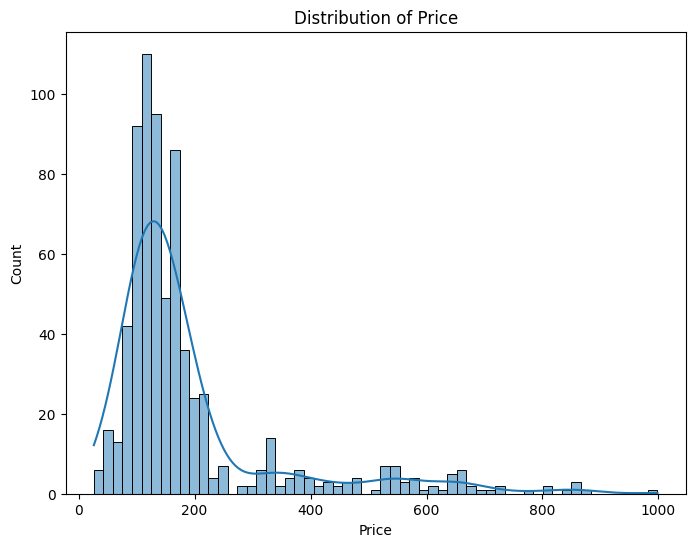

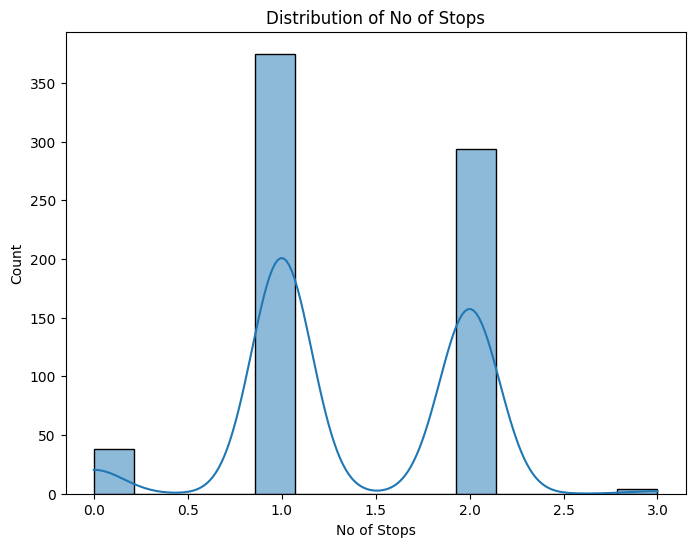

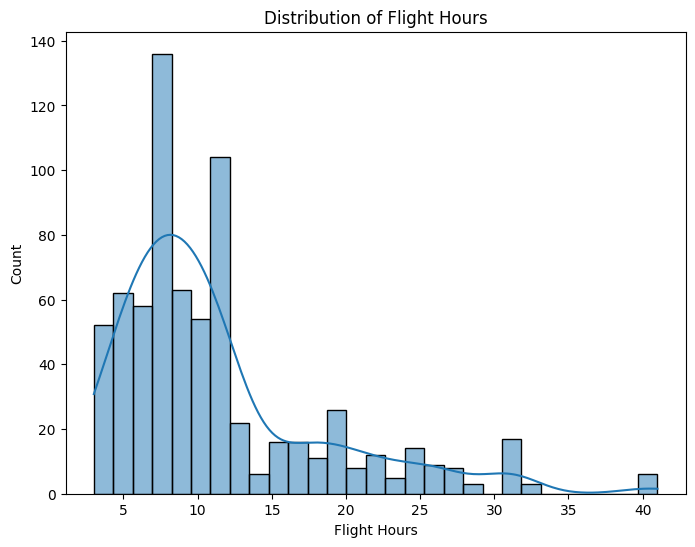

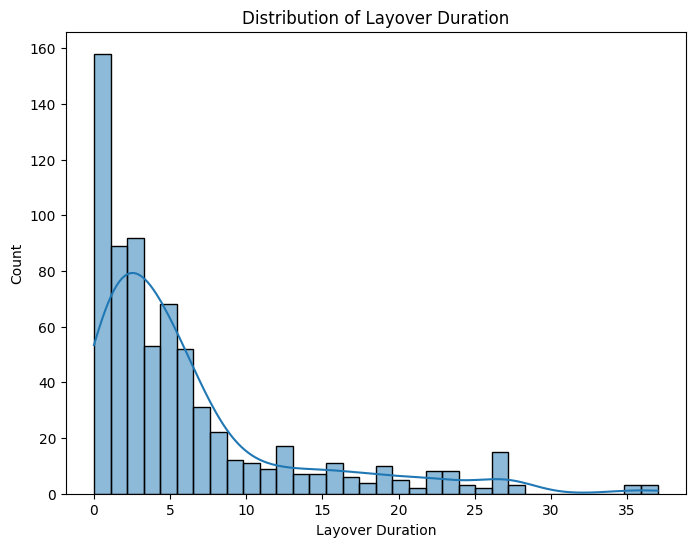

In [ ]:
# 1. Distribution of Numeric Variables
numeric_columns = ['Price', 'No of Stops', 'Flight Hours', 'Layover Duration']
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    print("\n")

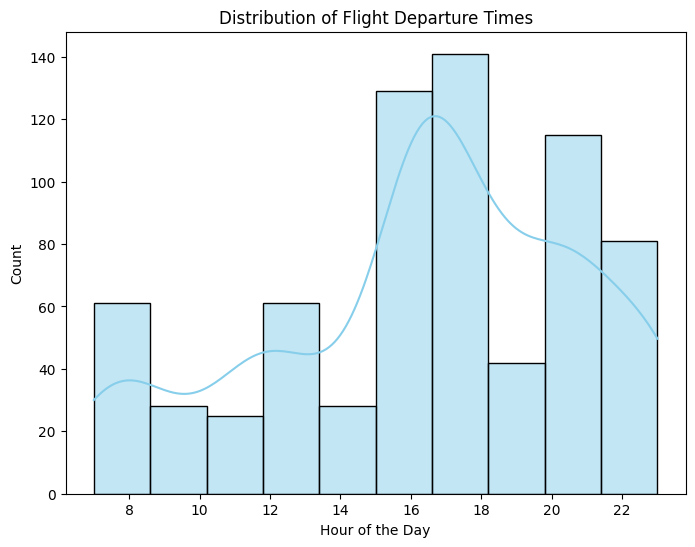

In [ ]:
# Flight Arrival Time in Hour of Day
plt.figure(figsize=(8, 6))
sns.histplot(pd.to_datetime(df['Arrival Time']).dt.hour, bins=10, kde=True, color='skyblue')
plt.title('Distribution of Flight Departure Times')
plt.xlabel('Hour of the Day')
plt.show()

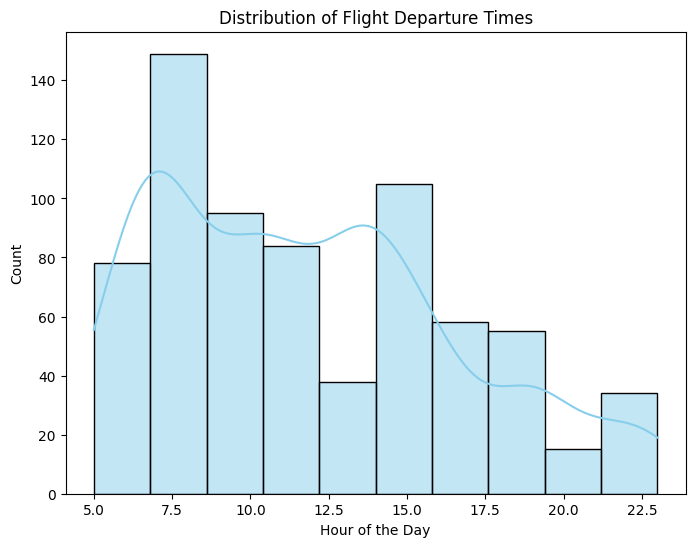

In [ ]:
# Flight Departure Time in Hour of Day
plt.figure(figsize=(8, 6))
sns.histplot(pd.to_datetime(df['Departure Time']).dt.hour, bins=10, kde=True, color='skyblue')
plt.title('Distribution of Flight Departure Times')
plt.xlabel('Hour of the Day')
plt.show()

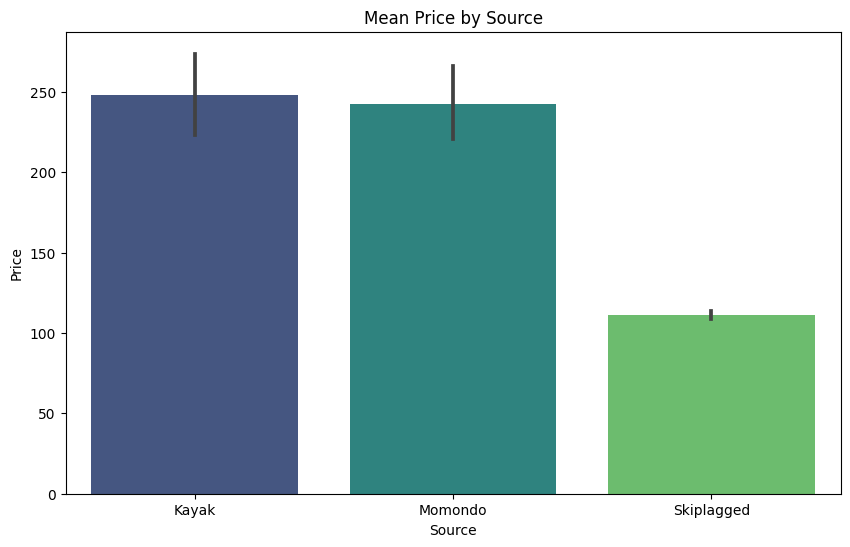

In [ ]:
# Average price per source
plt.figure(figsize=(10, 6))
sns.barplot(x='Source', y='Price', data=df, estimator=np.mean, palette='viridis')
plt.title('Mean Price by Source')
plt.show()

### Distribution of Categorical Variables

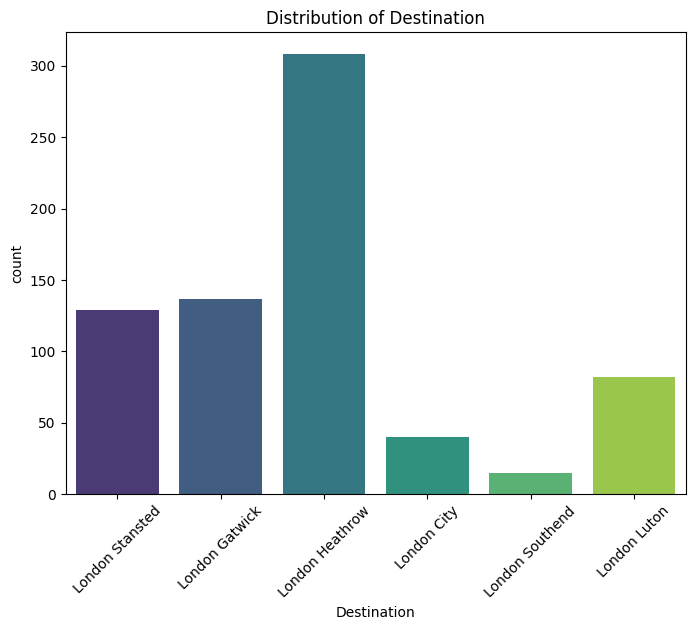

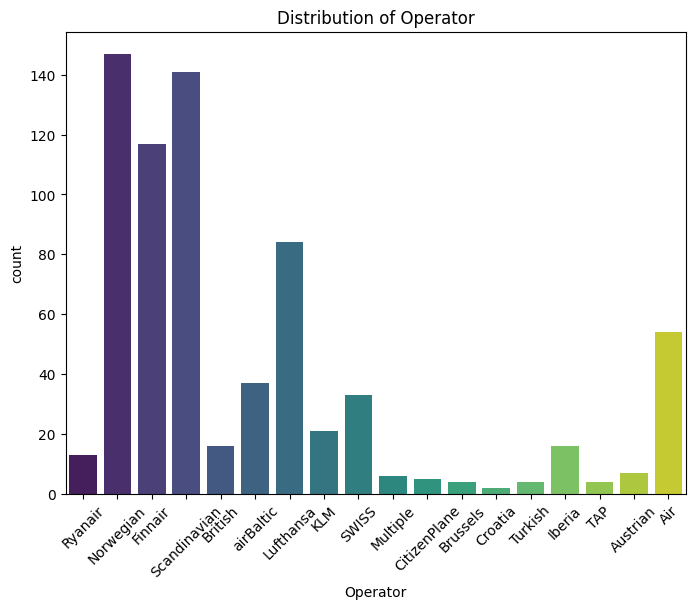

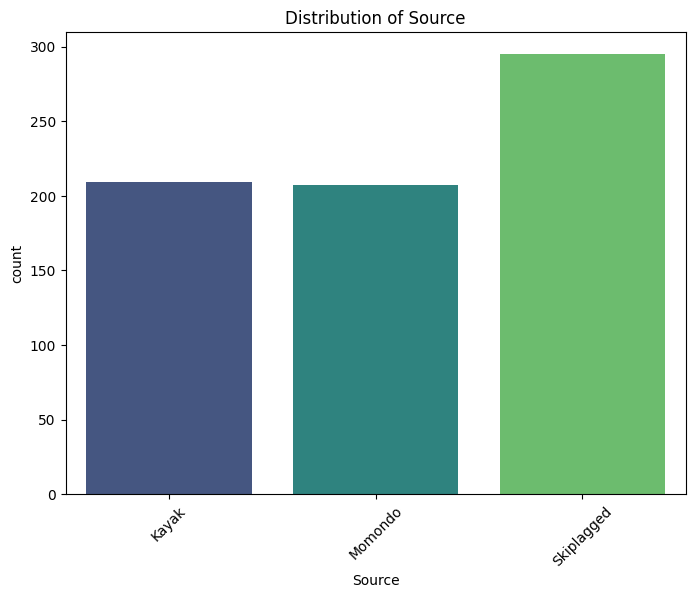

In [ ]:
# 2. Categorical Variables
categorical_columns = ['Destination', 'Operator', 'Source']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Correlation

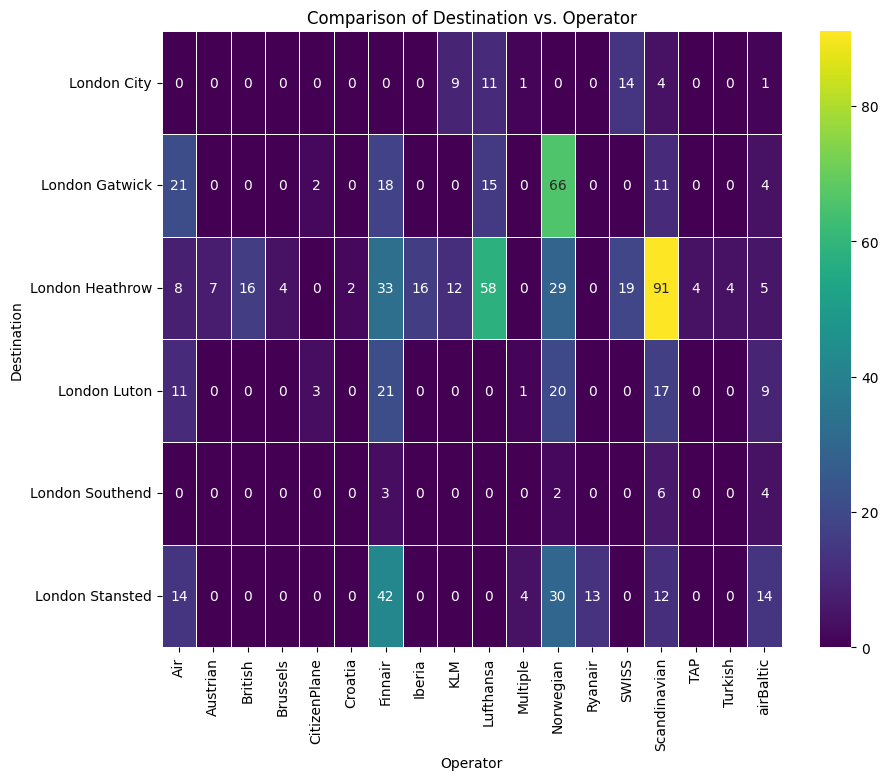

In [ ]:
# 3. Correlation
# Create a cross-tabulation of Destination and Operator
cross_tab = pd.crosstab(df['Destination'], df['Operator'])

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Comparison of Destination vs. Operator')
plt.xlabel('Operator')
plt.ylabel('Destination')
plt.show()

<ipython-input-25-acbc241a8dc9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


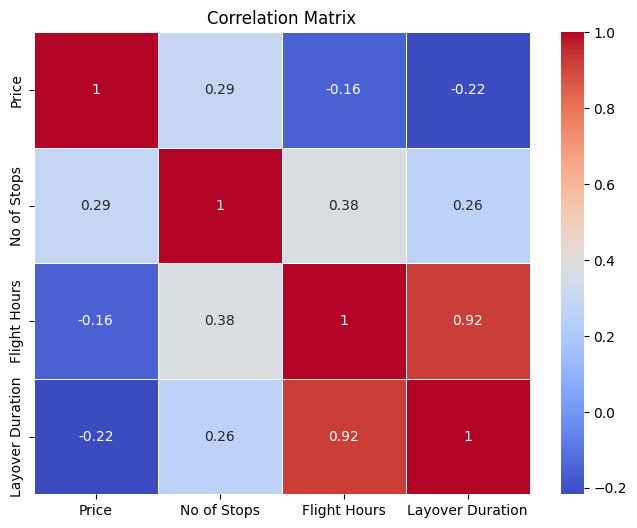

In [ ]:
# Entire data
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Bivariate Analysis

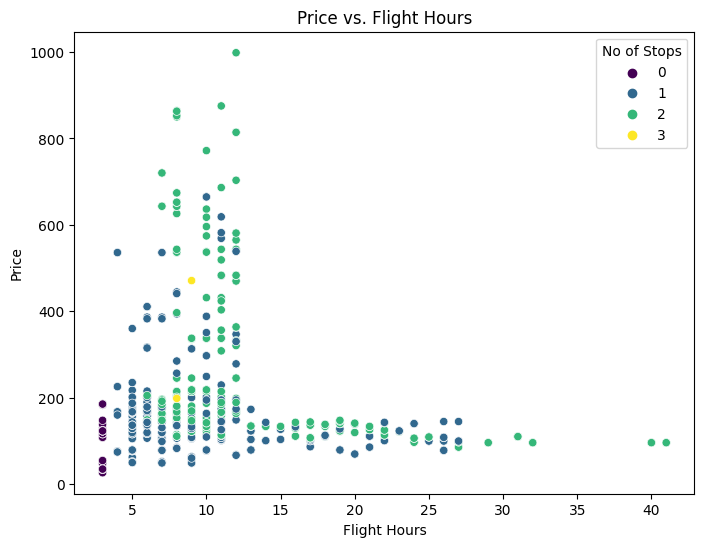

In [ ]:
# 4. Bivariate Analysis

# Flight Hours compared to Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Flight Hours', y='Price', data=df, hue='No of Stops', palette='viridis')
plt.title('Price vs. Flight Hours')
plt.show()

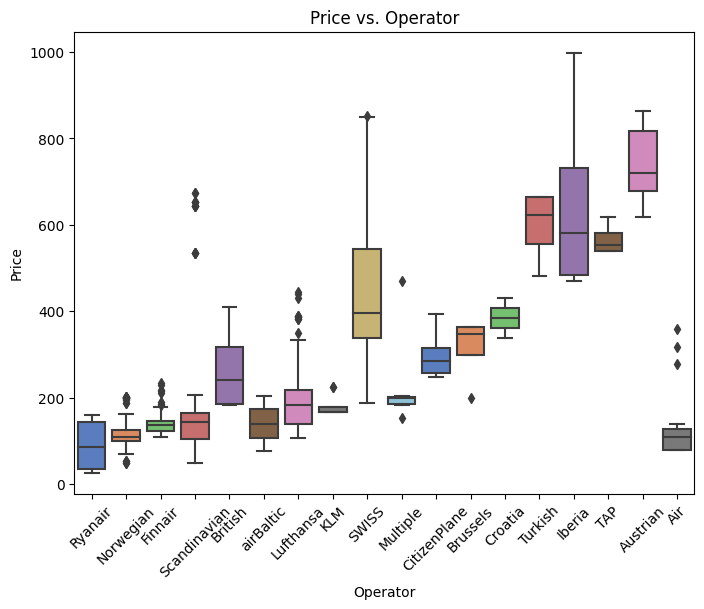

In [ ]:
# Price vs Operator
plt.figure(figsize=(8, 6))
sns.boxplot(x='Operator', y='Price', data=df, palette='muted')
plt.title('Price vs. Operator')
plt.xticks(rotation=45)
plt.show()

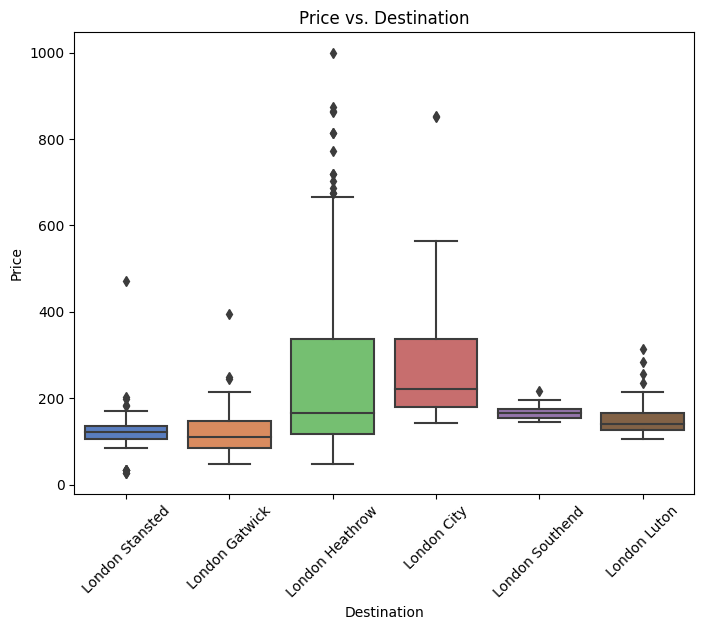

In [ ]:
# Price vs Destination Airport
plt.figure(figsize=(8, 6))
sns.boxplot(x='Destination', y='Price', data=df, palette='muted')
plt.title('Price vs. Destination')
plt.xticks(rotation=45)
plt.show()

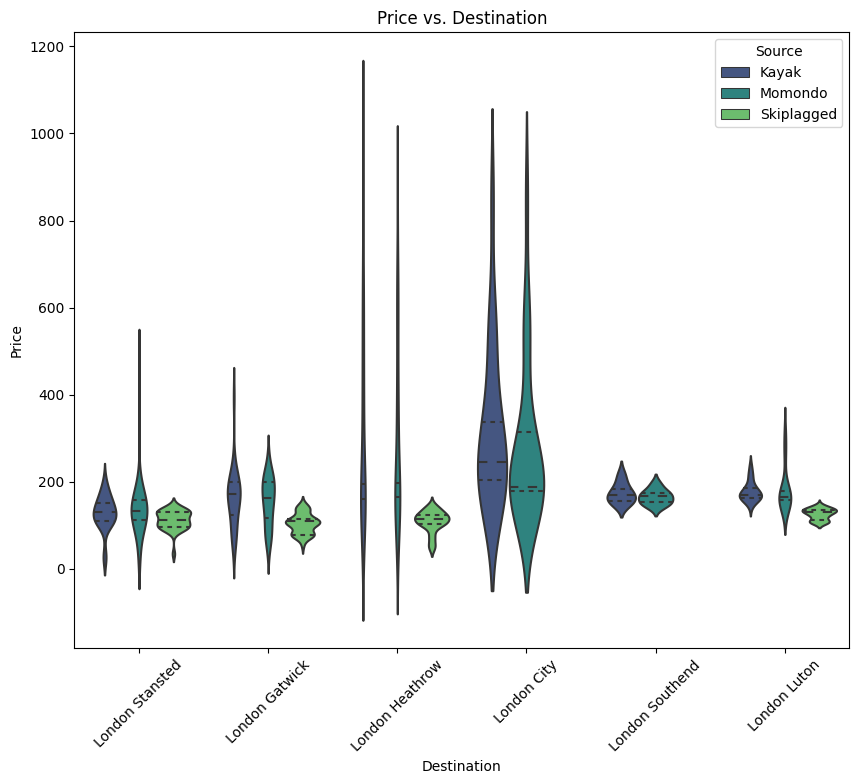

In [ ]:
# Price vs Destination
plt.figure(figsize=(10, 8))
sns.violinplot(x='Destination', y='Price', hue='Source', data=df, inner='quart', palette='viridis')
plt.title('Price vs. Destination')
plt.xticks(rotation=45)
plt.show()

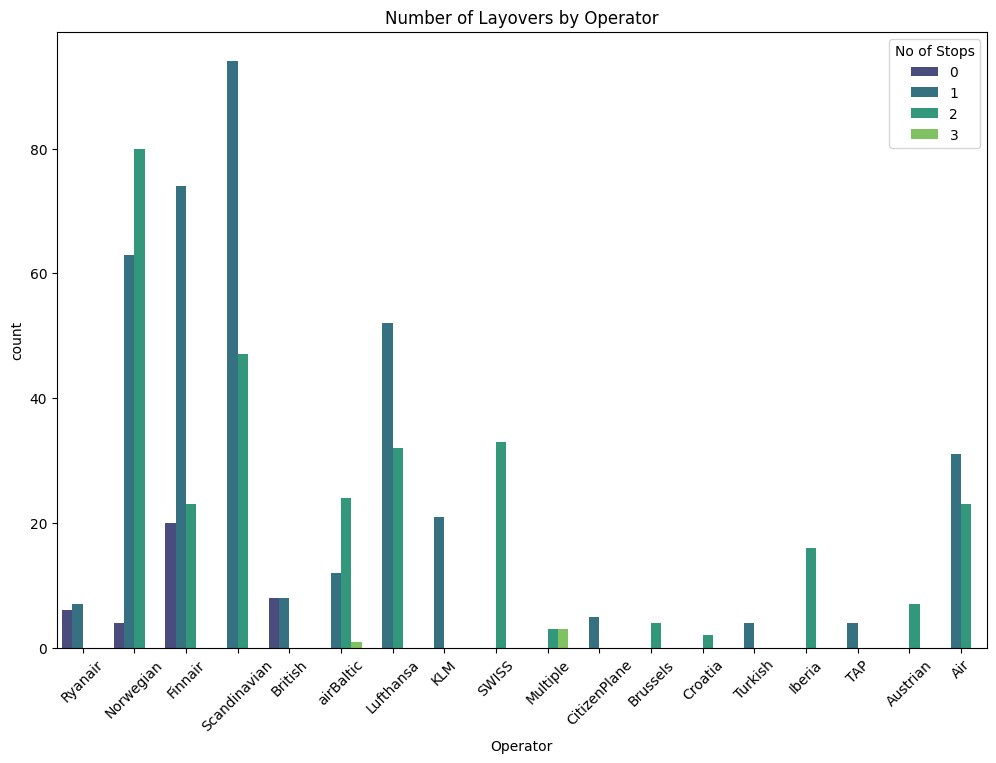

In [ ]:
# No of Layovers vs Operator
plt.figure(figsize=(12, 8))
sns.countplot(x='Operator', data=df, hue='No of Stops', palette='viridis')
plt.title('Number of Layovers by Operator')
plt.xticks(rotation=45)
plt.show()

## Step 4: Interaction with the User

In the final step of the project, a simple user interface was implemented to filter flights based on the user's criteria. Per the project's requirements, the flights will be filtered based on the following criteria:

*   Price range
*   Flight duration range
*   Number of stops
*   Airline operator

A final user criteria selection was then implemented based on the previously filtered data to better streamline the response to the user's preferences.


In [ ]:
from datetime import datetime
import json
import ast

In [ ]:
def filter_flights(df, criteria):
    filtered_df = df.copy()

    # Apply user-defined criteria
    for key, value in criteria.items():
        if key == 'price_range':
            filtered_df = filtered_df[(filtered_df['Price'] >= value[0]) & (filtered_df['Price'] <= value[1])]
        elif key == 'duration_range':
            filtered_df = filtered_df[(filtered_df['Flight Hours'] >= value[0]) & (filtered_df['Flight Hours']  <= value[1])]
        elif key == 'direct_flight':
            filtered_df = filtered_df[filtered_df['No of Stops'] == 0]
        elif key == 'max_stops':
            filtered_df = filtered_df[filtered_df['No of Stops'] <= value]
        elif key == 'airline':
            filtered_df = filtered_df[filtered_df['Operator'] == value]

    return filtered_df

def select_flights(df, criteria):
    selected_df = df.copy()

    # Apply user-defined criteria
    for key, value in criteria.items():
        if key == 'earliest_time':
            selected_df = selected_df[pd.to_datetime(df['Departure Time']) >= value]
        elif key == 'max_duration':
            selected_df = selected_df[selected_df['Flight Hours']  <= value]
        elif key == 'pref_airline':
            selected_df = selected_df[selected_df['Operator'] == value]

    # Sort the DataFrame based on price
    sorted_df = selected_df.sort_values(by='Price')

    return sorted_df

def find_cheapest_fastest_flight(filtered_df):
    cheapest_flight = filtered_df.iloc[0]

    fastest_flight_index = filtered_df['Flight Hours'].idxmin()
    fastest_flight = filtered_df.loc[fastest_flight_index]

    return cheapest_flight, cheapest_flight

def display_flight_details(flight):
  print("Source: Helsinki-Vantaa")
  print("Destination: ", flight['Destination'])
  print("Total Duration: ", flight['Flight Duration'])
  if int(flight['No of Stops']) > 0:
    print("Direct Flight: No")
    print("Total Layover Duration: ", flight['Layover Duration'], " hours")
    layovers = ast.literal_eval(flight['Layovers'])
    for i, layover in enumerate(layovers):
      print(str(i+1), ": Layover in ", layover['Location'], " for ", str(layover['Duration']), " hours")
  else:
    print("Direct Flight: Yes!")


In [ ]:
# User Interaction
user_preferences = {}
user_preferences_filtered = {}

print("Welcome to FlightMaster.\n\nWe have the following airline operators:\n")

# Get the list of available airline operators
available_operators = df['Operator'].unique()
for operator in available_operators:
    print(operator)

# This process accepts user input from the console and populates a dictionary 'user_preferences'
# The dictionary entries i.e user criteria, are then used to filter the data

print("\nEnter your search criteria below:\n")

try:
  price_range = str(input("Price range in Euros(€) e.g 50 - 200")).strip().split("-")
  user_preferences['price_range'] = (float(price_range[0]), float(price_range[1]))

  duration_range = str(input("Flight duration range (in hours) e.g 2 - 5")).strip().split("-")
  user_preferences['duration_range'] = (int(duration_range[0]), int(duration_range[1]))

  direct_flight = str(input("Do you only want a direct flight ? (Yes or No)")).strip()
  if direct_flight.lower() == 'yes':
    user_preferences['direct_flight'] = True
  else:
    max_stops = int(str(input("What is your maximum number of stops ? e.g 2")).strip())
    user_preferences['max_stops'] = int(max_stops)

  airline = str(input("Your preferred airline (if you have one)")).strip()
  if airline != "":
    user_preferences['airline'] = airline

except:
  print("You didn't enter the details correctly. Please try again!")

# Get the flights that fulfill the user's criteria
flights_list = filter_flights(df, user_preferences)

print("\n\nHere are your available flights:\n")
print("We have ", len(flights_list), " flights that match your search criteria.\n")
display(flights_list)

available_operators_from_list = flights_list['Operator'].unique()

# This process accepts additional user input from the console and populates a dictionary 'user_preferences_filtered'
# In this case, the already filtered flight list is further filtered based on the user's finals selection criteria

print("\n\nBased on the results above:\n")
try:
  earliest_time = str(input("What is your earliest convinient time for departure (in 24 hours format: HH:MM)? ")).strip()
  earliest_time = datetime.strptime(earliest_time, "%H:%M")
  user_preferences_filtered['earliest_time'] = earliest_time

  max_duration = str(input("What is your maximum duration time (in hours)? e.g 2, 4 ")).strip()
  user_preferences_filtered['max_duration'] = int(max_duration)

  if len(available_operators_from_list) == 1:
    print("\nOnly flights operated by ", available_operators_from_list[0], " are available based on your search criteria")
  else:
    print("\nWe have flights from the following operators based on your search criteria")
    for operator in available_operators_from_list:
      print(operator)

    pref_airline = str(input("Select your preferred flight company from the list (if you have one)")).strip()
    if pref_airline != "":
      user_preferences_filtered['pref_airline'] = pref_airline

except:
  print("You didn't enter the details correctly. Please try again!")

final_flight_list = select_flights(flights_list, user_preferences_filtered)
if len(final_flight_list) > 0:
  cheapest_flight, fastest_flight = find_cheapest_fastest_flight(final_flight_list)

  print("\nCheapest flight:")
  display_flight_details(cheapest_flight)

  print("\n")

  print("\nFastest flight:")
  display_flight_details(fastest_flight)

else:
  print("\nNo flight matches your final selection criteria!")

print("\nThank you for using FlightMaster!")


Welcome to FlightMaster.

We have the following airline operators:

Ryanair
Norwegian
Finnair
Scandinavian
British
airBaltic
Lufthansa
KLM
SWISS
Multiple
CitizenPlane
Brussels
Croatia
Turkish
Iberia
TAP
Austrian
Air

Enter your search criteria below:

Price range in Euros(€) e.g 50 - 20050
You didn't enter the details correctly. Please try again!


Here are your available flights:

We have  711  flights that match your search criteria.



,Start,Destination,Departure Time,Arrival Time,Flight Duration,Price,No of Stops,Layovers,Operator,Source,Flight Hours,Layover Duration
0,Helsinki,London Stansted,22:10:00,23:20:00,3h 10m,27.26,0,[],Ryanair,Kayak,3,0
1,Helsinki,London Stansted,22:10:00,23:20:00,3h 10m,26.32,0,[],Ryanair,Kayak,3,0
2,Helsinki,London Gatwick,09:50:00,11:00:00,3h 10m,47.94,0,[],Norwegian,Kayak,3,0
3,Helsinki,London Heathrow,07:50:00,09:10:00,3h 20m,127.84,0,[],Finnair,Kayak,3,0
4,Helsinki,London Heathrow,14:00:00,15:15:00,3h 15m,127.84,0,[],Finnair,Kayak,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
706,Helsinki,London Heathrow,16:25:00,17:55:00,27h30m,144.76,1,"[{'Duration': 23, 'Location': 'ARNStockholm'}]",Scandinavian,Skiplagged,27,23
707,Helsinki,London Gatwick,23:40:00,16:55:00,19h15m,145.70,2,"[{'Duration': 9, 'Location': 'ARNStockholm'}, ...",Finnair,Skiplagged,19,14
708,Helsinki,London Luton,13:35:00,20:55:00,9h20m,146.64,2,"[{'Duration': 2, 'Location': 'ARNStockholm'}, ...",Finnair,Skiplagged,9,3
709,Helsinki,London Gatwick,07:40:00,13:25:00,7h45m,147.58,2,"[{'Duration': 1, 'Location': 'ARNStockholm'}, ...",Norwegian,Skiplagged,7,3




Based on the results above:

What is your earliest convinient time for departure (in 24 hours format: HH:MM)? 09:00
What is your maximum duration time (in hours)? e.g 2, 4 5

We have flights from the following operators based on your search criteria
Ryanair
Norwegian
Finnair
Scandinavian
British
airBaltic
Lufthansa
KLM
SWISS
Multiple
CitizenPlane
Brussels
Croatia
Turkish
Iberia
TAP
Austrian
Air
Select your preferred flight company from the list (if you have one)

Cheapest flight:
Source: Helsinki-Vantaa
Destination:  London Stansted
Total Duration:  3h 10m
Direct Flight: Yes!



Fastest flight:
Source: Helsinki-Vantaa
Destination:  London Stansted
Total Duration:  3h 10m
Direct Flight: Yes!

Thank you for using FlightMaster!
